# Physics 77/88 - Fall 2024 - Homework 3 
## Visualization (and more about functions)
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 9 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (5P)

The Poissonian Stepper is a common model that helps to understand diffusion processes. In its simplest 1D, oneway version, the stepper takes a step after the time $\tau$, where<br>
<br>
$\tau = -\frac{1}{\nu}\,ln(r)$<br>
<br>
with $\nu$ being the hopping rate and $r$ being a uniformly distributed random number (0, 1).<br>
Write the function **PoissStep.py** using *def*, that:<br> 
<br>
- takes the number of steps and the hopping rate as input arguments.<br>
- takes the hopping rate with the default value $\nu = 1$ <br>
- runs the Poissonian Stepper and generates and saves the following plot as .pdf:<br>
<br>

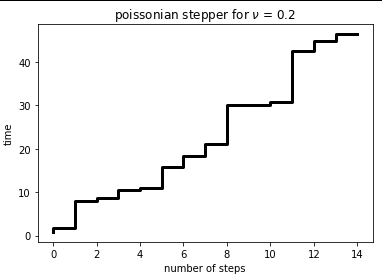

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def PoissStep(Nstep = 100, nu = 1):
    
    R   = np.random.uniform(0, 1, Nstep)
    tau = - (1/nu)*np.log(R)
    
    T   = np.cumsum(tau)
    
    fig1 = plt.figure()
    plt.step(range(Nstep), T, linewidth = 3, color = 'black')
    plt.xlabel('number of steps')
    plt.ylabel('time')
    plt.title(r'poissonian stepper for $\nu$ = ' + str(nu))
    fig1.savefig('Poiss.pdf')

## Problem 2 (10P) <br>

When we will talk about ODEs, we will investigate the behaviour of non-linear systems and the stability of their solutions.
After many iterations ($t\approx 10^2$), the equation<br>
<br>
$x_{t+1} = r\,x_t\,(1 - x_t)$<br>
<br>
reaches a constant value (aka *fixed point*).<br> 
Write the function **Feigenbaum.py** using *def*, that runs the above equation for different $x_0$ and different $r$ and that generates the following plot.<br>
<br>

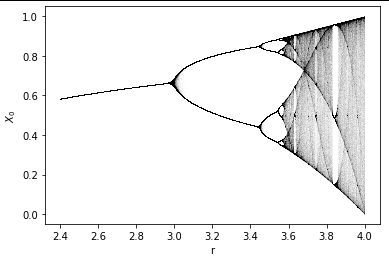

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def FeigenBaum(Nit = 100):
    
    Xinit  = np.arange(0.001, 1, 0.001)
    R      = np.arange(2.4  , 4, 0.001)
    
    Xfinal = np.zeros((len(R), len(Xinit)))
    
    for ix, x in enumerate(Xinit):
        for ir, r in enumerate(R):
            start = x
            for i in range(Nit):
                start = r*start*(1 - start)
                
            Xfinal[ir, ix] = start
            
        plt.scatter(R, Xfinal[:, ix], color = [0, 0, 0, 0.005], s = 1)
    plt.xlabel('r')
    plt.ylabel('$X_{0}$')
    plt.show()

## Problem 3 (7P)

We read the following dataset using **pandas** by running<br>

In [69]:
import pandas as pd
data = pd.read_csv("cystfibr.txt", delim_whitespace = True)

Write a function using *def*, that creates an sns pairplot in kde mode like in the following figure: 

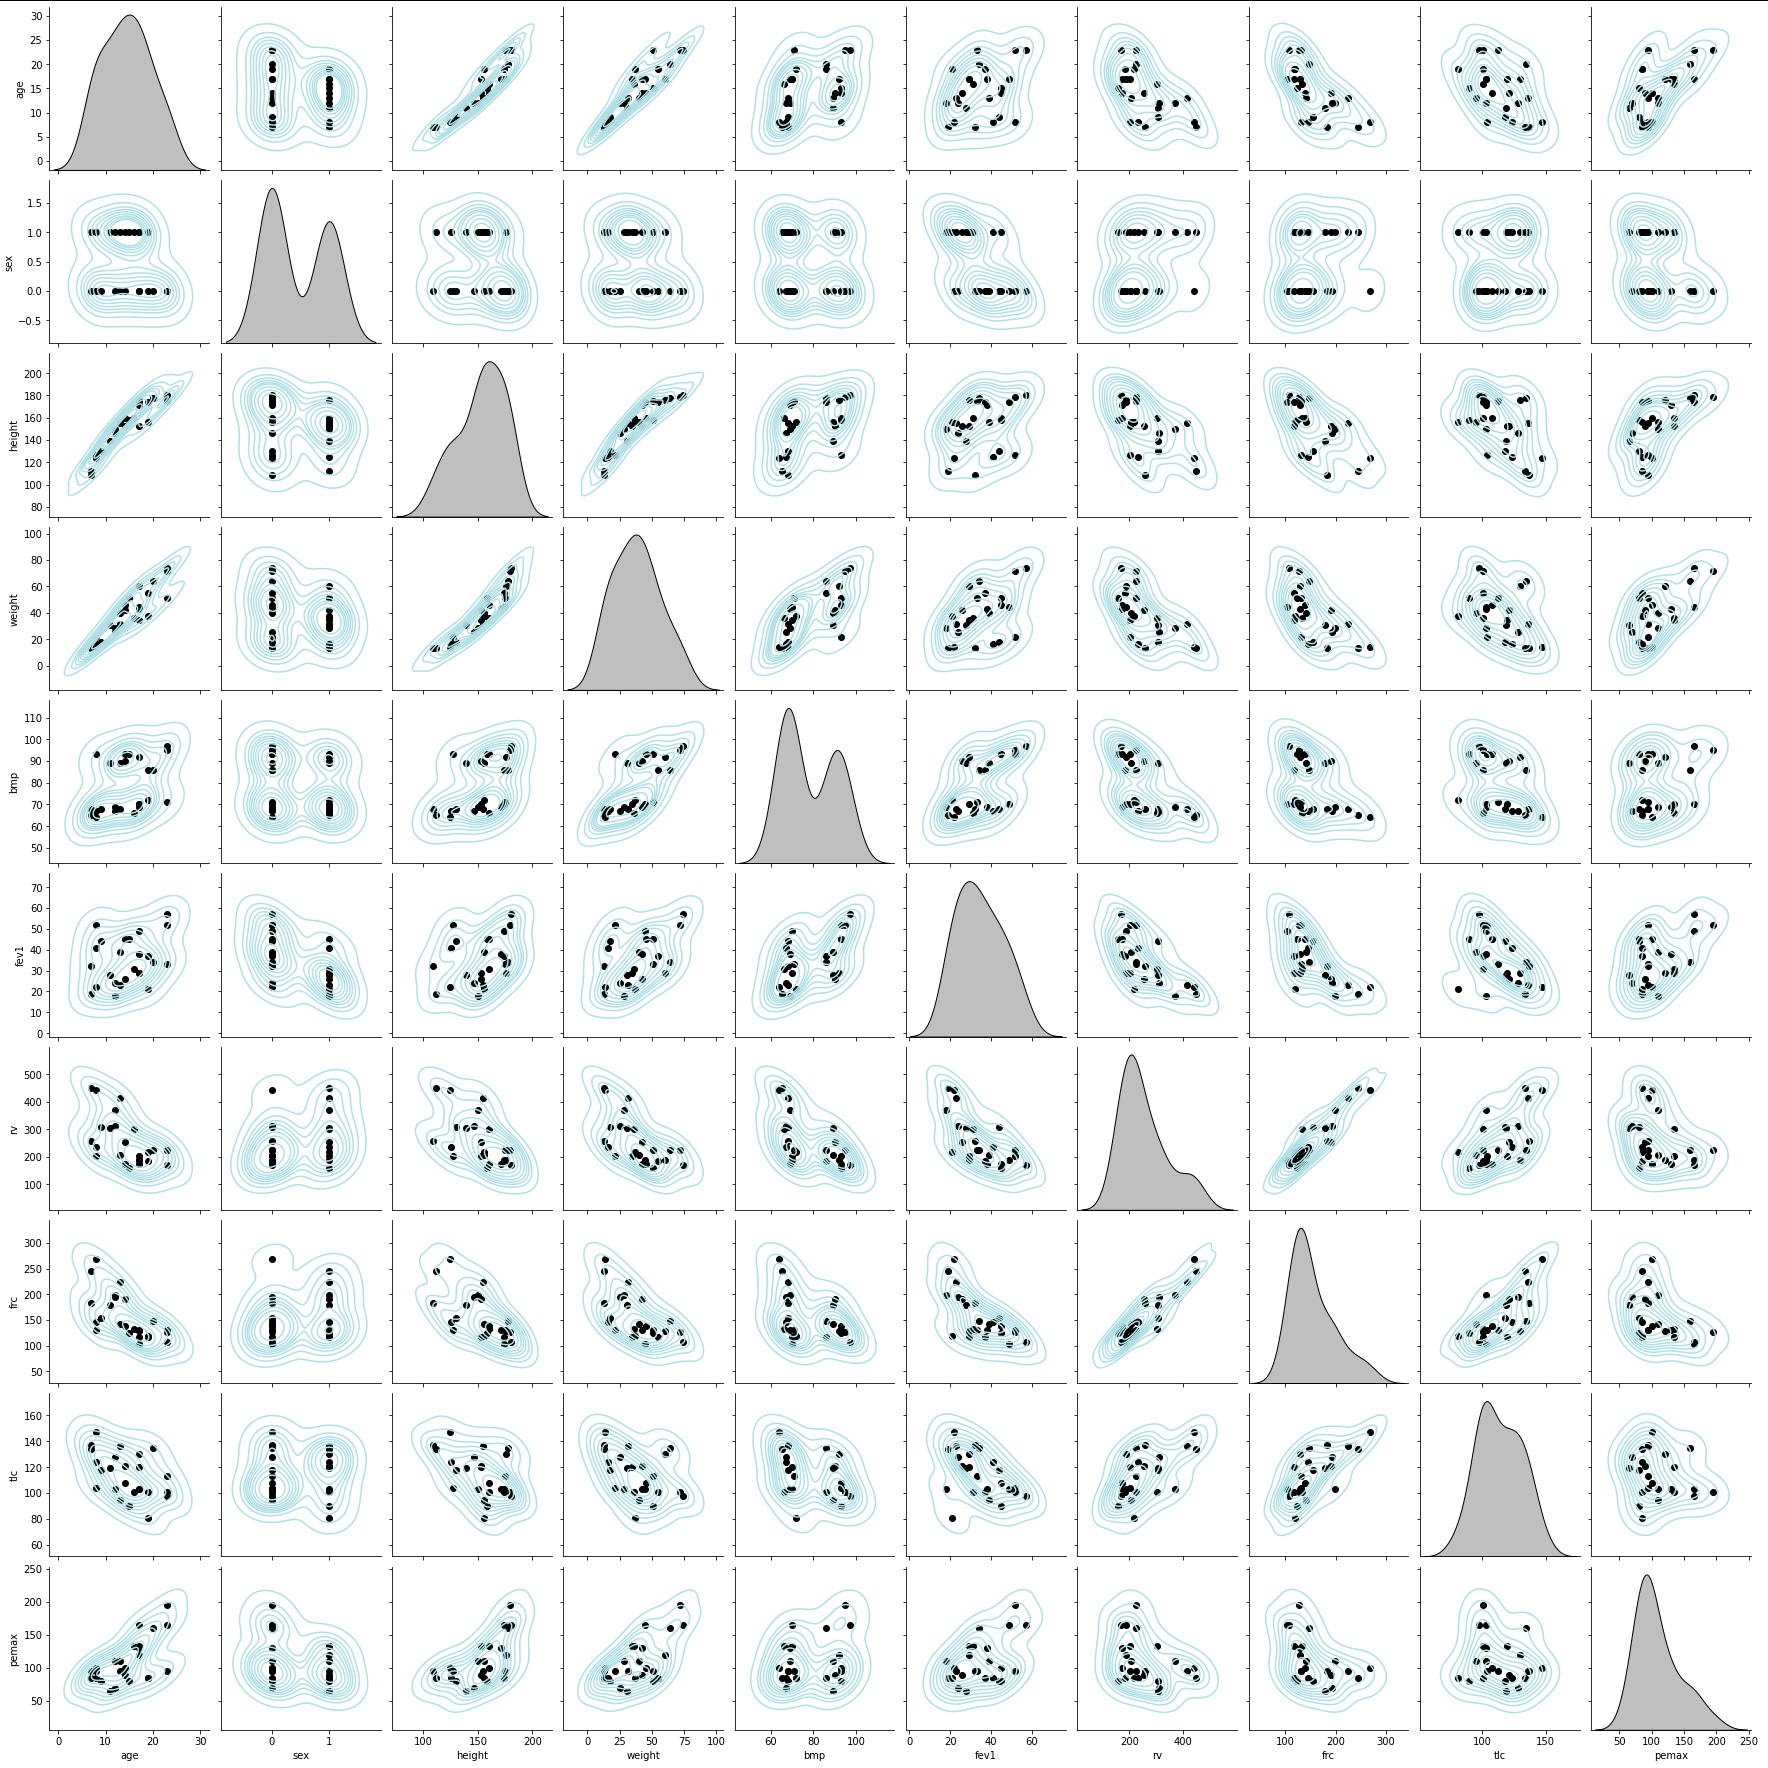

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def SNSplot():
    
    data = pd.read_csv("cystfibr.txt", delim_whitespace = True)
    out = sns.pairplot(data, kind = "kde", \
                       plot_kws = {'color':[176/255,224/255,230/255]}, \
                       diag_kws = {'color':'black'})
    out.map_offdiag(plt.scatter, color = 'black')

<br>

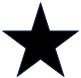
## Problem 4 (optional 3P)

Create a **class**, *"MyClass"*, that takes an item when initialized. The class should contain an attribute that allows the item to be multiplied by a second item (input is type *int*), i. e. construct an operator overflow like e. g. for type *list*. Furthermore, the class should have an attribute allowing to return the length of the item.

In [8]:
class MyClass():
    
    def __init__(self, item1):
        self.item1 = item1
        
    def __mul__(self, item2: int):
        return self.item1 * item2
    
    def __len__(self):
        return len(self.item1)

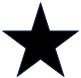
## Problem 5 (optional 3P)

The decorator *"My_Timer"* is a useful function that measures runtime of Python scripts

In [24]:
def My_Timer(my_function):
    def get_args(*args,**kwargs):
        t1 = time.monotonic()
        results = my_function(*args,**kwargs)
        t2 = time.monotonic()
        dt = t2 - t1
        print("Total runtime: " + str(dt) + ' seconds')
        return results
    return get_args

Write a **class**, *"My_Timer"*, that serves the same purpose and has the same functionality.

In [10]:
import time

class My_Timer():

    def __init__(self, my_function):
        self.arg = my_function

    def __call__(self, *args,**kwargs):

        t1 = time.monotonic()
        
        results = self.arg(*args,**kwargs)
        
        t2 = time.monotonic()
        dt = t2 - t1
        
        print("Total runtime: " + str(dt))

        return results